# Predictors of Pregnancy Risks

In [119]:
# Dependencies and Setup
%matplotlib inline

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress, pearsonr
import numpy as np
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [120]:
# Specifying path to CSV file
file_path = 'C:\\Users\\lnata\\GitHub\\Project1group3\\Resources\\maternal_health.csv'

# Read the .csv file
maternal_health = pd.read_csv(file_path)

In [121]:
# Print DataFrame
maternal_health.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [122]:
# Count each risk level (low, mid, high)
risk_level_counts = maternal_df["RiskLevel"].value_counts()

# Print
risk_level_counts

RiskLevel
low risk     234
high risk    112
mid risk     106
Name: count, dtype: int64

In [123]:
# Dropping duplicate data
maternal_df = maternal_health.drop_duplicates(subset=None, keep='first', inplace=False)
maternal_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


In [124]:
# Adding a new column 'Woman_ID' with unique identifiers starting from 1
maternal_health['Woman_ID'] = range(1, len(maternal_health) + 1)

# Reordering the DataFrame columns
columns = ['Woman_ID'] + [col for col in maternal_health.columns if col != 'Woman_ID']
maternal_health = maternal_health[columns]

# Print
maternal_health.head()

,Woman_ID,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,1,25,130,80,15.0,98.0,86,high risk
1,2,35,140,90,13.0,98.0,70,high risk
2,3,29,90,70,8.0,100.0,80,high risk
3,4,30,140,85,7.0,98.0,70,high risk
4,5,35,120,60,6.1,98.0,76,low risk


In [125]:
# Renaming columns for better understanding
maternal_renamed = maternal_health.rename(columns={"Woman_ID":"Woman ID", "BS":"Blood Sugar", "SystolicBP":"Systolic Blood Pressure", 
                                                   "DiastolicBP":"Diastolic Blood Pressure", "BodyTemp":"Body Temp.", 
                                                   "HeartRate":"Heart Rate", "RiskLevel":"Risk Level"})
maternal_renamed.head()

,Woman ID,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Sugar,Body Temp.,Heart Rate,Risk Level
0,1,25,130,80,15.0,98.0,86,high risk
1,2,35,140,90,13.0,98.0,70,high risk
2,3,29,90,70,8.0,100.0,80,high risk
3,4,30,140,85,7.0,98.0,70,high risk
4,5,35,120,60,6.1,98.0,76,low risk


In [126]:
# Create a new column "Blood Pressure" by combining "Systolic Blood Pressure" and "Diastolic Blood Pressure"
maternal_renamed.loc[:, 'Blood Pressure'] = maternal_renamed['Systolic Blood Pressure'].astype(str) + '/' + maternal_renamed['Diastolic Blood Pressure'].astype(str)
column_to_move = maternal_renamed.pop('Blood Pressure')
maternal_renamed.insert(4, 'Blood Pressure', column_to_move)

# Print
maternal_renamed.head()

,Woman ID,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Pressure,Blood Sugar,Body Temp.,Heart Rate,Risk Level
0,1,25,130,80,130/80,15.0,98.0,86,high risk
1,2,35,140,90,140/90,13.0,98.0,70,high risk
2,3,29,90,70,90/70,8.0,100.0,80,high risk
3,4,30,140,85,140/85,7.0,98.0,70,high risk
4,5,35,120,60,120/60,6.1,98.0,76,low risk


# Blood Pressure VS Risk Level
## Hypothesis:
Women who have high blood pressure are at a higher risk than women who are within the normal blood pressure range.

In [144]:
maternal_bp = maternal_renamed[['Woman ID', 'Age', "Systolic Blood Pressure", "Diastolic Blood Pressure", "Blood Pressure"]].copy()
maternal_bp.head()

,Woman ID,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Pressure
0,1,25,130,80,130/80
1,2,35,140,90,140/90
2,3,29,90,70,90/70
3,4,30,140,85,140/85
4,5,35,120,60,120/60


In [145]:
# Define bins for Systolic BP
systolic_bins = [0, 119, 129, max(maternal_bp['Systolic Blood Pressure'])+1]
systolic_labels = ["Normal", "Elevated", "High"]

# Create a copy of the DataFrame to avoid modifying the original data
sys_categorized = maternal_bp.copy()

# Use `pd.cut` to categorize Systolic BP
sys_categorized['Systolic BP Category'] = pd.cut(sys_categorized['Systolic Blood Pressure'], bins=systolic_bins, labels=systolic_labels, include_lowest=True)

sys_categorized.head()

,Woman ID,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Pressure,Systolic BP Category
0,1,25,130,80,130/80,High
1,2,35,140,90,140/90,High
2,3,29,90,70,90/70,Normal
3,4,30,140,85,140/85,High
4,5,35,120,60,120/60,Elevated


In [146]:
# Define bins for Diastolic BP
diastolic_bins = [0, 79, 89, max(maternal_bp['Diastolic Blood Pressure'])+1]
diastolic_labels = ["Normal", "Elevated", "High"]

# Create a copy of DF above to include Systolic range
dias_categorized = sys_categorized.copy()

# Use `pd.cut` to categorize Diastolic BP
dias_categorized['Diastolic BP Category'] = pd.cut(dias_categorized['Diastolic Blood Pressure'], bins=diastolic_bins, labels=diastolic_labels, include_lowest=True)

dias_categorized.head()

,Woman ID,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Pressure,Systolic BP Category,Diastolic BP Category
0,1,25,130,80,130/80,High,Elevated
1,2,35,140,90,140/90,High,High
2,3,29,90,70,90/70,Normal,Normal
3,4,30,140,85,140/85,High,Elevated
4,5,35,120,60,120/60,Elevated,Normal


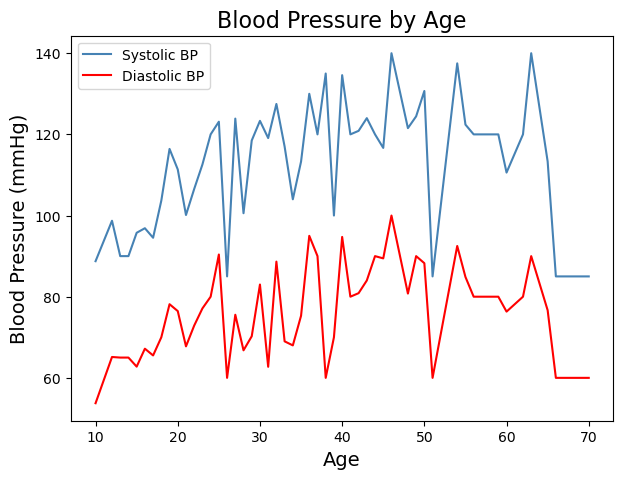

In [147]:
# Generate a line plot for BP
grouped_bp = maternal_bp.groupby('Age')[['Systolic Blood Pressure', 'Diastolic Blood Pressure']].mean()

# Plotting data
plt.figure(figsize=(7, 5))
plt.plot(grouped_bp['Systolic Blood Pressure'], linestyle='-', color='steelblue', label='Systolic BP')
plt.plot(grouped_bp['Diastolic Blood Pressure'], linestyle='-', color='red', label='Diastolic BP')

# Labeling 
plt.xlabel('Age', fontsize=14)
plt.ylabel('Blood Pressure (mmHg)', fontsize=14)
plt.title('Blood Pressure by Age', fontsize=16)
plt.legend()

# Print
plt.savefig("C:/Users/lnata/Github/Project1group3/Output-Data\Fig1.png")
plt.show()

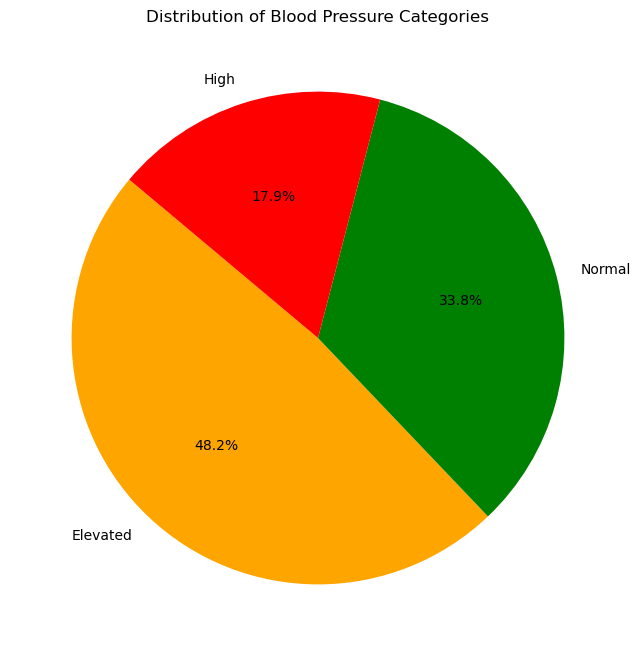

In [148]:
# Creating a pie chart distributing blood pressure categories
def categorize_bp(row):
    if row['Systolic Blood Pressure'] < 120 and row['Diastolic Blood Pressure'] < 80:
        return 'Normal'
    elif (120 <= row['Systolic Blood Pressure'] < 130) or (80 <= row['Diastolic Blood Pressure'] < 89):
        return 'Elevated'
    else:
        return 'High'

maternal_bp['BP_Category'] = maternal_bp.apply(categorize_bp, axis=1)
category_counts = maternal_bp['BP_Category'].value_counts()

# Ploting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'green', 'red'])
plt.title('Distribution of Blood Pressure Categories')

# Print
plt.savefig("C:/Users/lnata/Github/Project1group3/Output-Data\Fig2.png")
plt.show()

In [149]:
stats.ttest_ind(grouped_bp["Systolic Blood Pressure"], grouped_bp["Diastolic Blood Pressure"], equal_var=False)

TtestResult(statistic=13.599127751943174, pvalue=1.3950072797968633e-23, df=90.39197000659932)

<span style="color:green"> The result of the pvalue was "0.00000000000000000000000636572839949892", therefore it is significant. </span>

# Blood Sugar VS Risk Level
## Hypothesis
How do Blood glucose levels (mmol/L) affect the risk level during pregnancy?

In [150]:
maternal_bs = maternal_renamed[['Woman ID', 'Age', "Blood Sugar",]].copy()
maternal_bs.head()

,Woman ID,Age,Blood Sugar
0,1,25,15.0
1,2,35,13.0
2,3,29,8.0
3,4,30,7.0
4,5,35,6.1


In [151]:
# Defining Bins for Blood Sugar
bs_bins = [0, 6, 12, max(maternal_bs['Blood Sugar'])+1]
bs_labels = ["Low Risk", "Mid Risk", "High Risk"]

# Create a copy of DF above to include Blood Sugar
bs_categorized = maternal_bs.copy()

# Use `pd.cut` to categorize Blood Sugar
bs_categorized['Risk Level by Blood Sugar'] = pd.cut(bs_categorized['Blood Sugar'], bins=bs_bins, labels=bs_labels, include_lowest=True)

bs_categorized.head()

,Woman ID,Age,Blood Sugar,Risk Level by Blood Sugar
0,1,25,15.0,High Risk
1,2,35,13.0,High Risk
2,3,29,8.0,Mid Risk
3,4,30,7.0,Mid Risk
4,5,35,6.1,Mid Risk


In [152]:
# Defining Bins for Age
age_bins = [0, 20, 30, 40, 50, max(bs_categorized['Age'])+1]
age_labels = ['<20', '20-30', '31-40', '41-50', '>50']

bs_categorized['Age Group'] = pd.cut(bs_categorized['Age'], bins=age_bins, labels=age_labels, right=False)

bs_categorized.head()

,Woman ID,Age,Blood Sugar,Risk Level by Blood Sugar,Age Group
0,1,25,15.0,High Risk,20-30
1,2,35,13.0,High Risk,31-40
2,3,29,8.0,Mid Risk,20-30
3,4,30,7.0,Mid Risk,31-40
4,5,35,6.1,Mid Risk,31-40


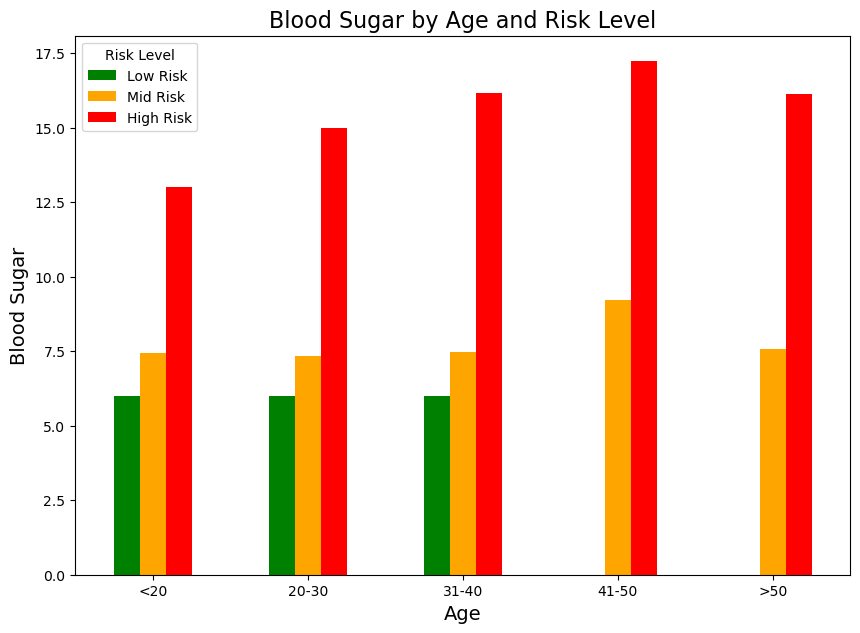

In [153]:
# Generate a bar graph for Blood Sugar
bloodsugar = bs_categorized.groupby(['Age Group', 'Risk Level by Blood Sugar'])['Blood Sugar'].mean().reset_index()

# Pivotting data to include each column
pivot_bs = bloodsugar.pivot(index='Age Group', columns='Risk Level by Blood Sugar', values='Blood Sugar')

# Plotting data
pivot_bs.plot(kind='bar', figsize=(10, 7), color= ["g", "orange", "red"])
plt.xlabel('Age', fontsize=14)
plt.ylabel('Blood Sugar', fontsize=14)
plt.title('Blood Sugar by Age and Risk Level', fontsize=16)
plt.legend(title='Risk Level')
plt.xticks(rotation=360)

# Print
plt.savefig("C:/Users/lnata/Github/Project1group3/Output-Data\Fig3.png")
plt.show()

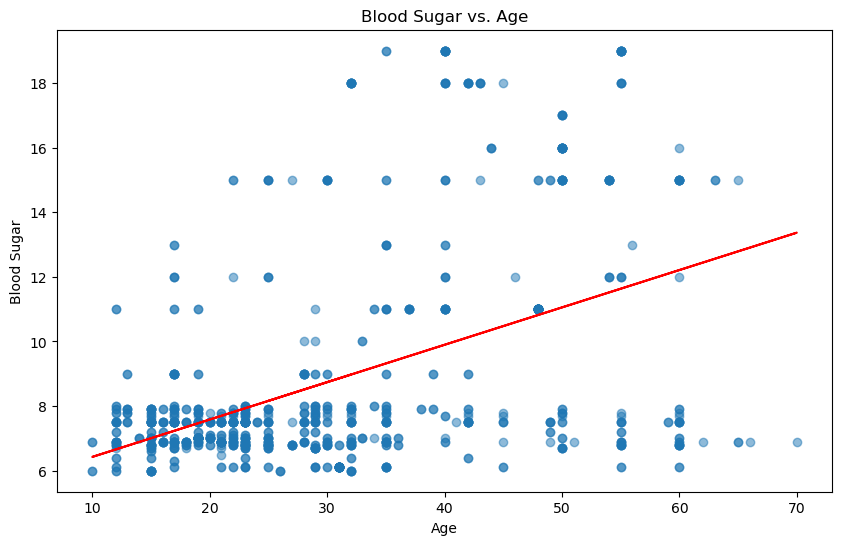

In [163]:
# Generate a Scatter Plot for Blood Sugar
from scipy.stats import linregress

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bs_categorized['Age'], bs_categorized['Blood Sugar'], alpha=0.5)

x_values = bs_categorized["Age"]
y_values = bs_categorized["Blood Sugar"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-21,10), fontsize=15, color = "red")


# Labeling
plt.title('Blood Sugar vs. Age')
plt.xlabel('Age')
plt.ylabel('Blood Sugar')

# Print
plt.savefig("C:/Users/lnata/Github/Project1group3/Output-Data\Fig4.png")
plt.show()